In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3D = True
import py3Dmol
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdDistGeom
from rdkit.Chem import AllChem
import rdkit
print(rdkit.__version__)

2024.09.2


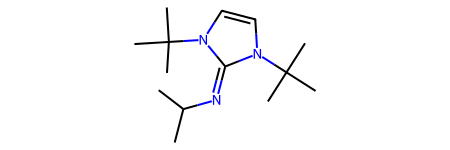

In [4]:
reactant_2 = Chem.MolFromSmiles("CC(C)N=c1n(C(C)(C)C)ccn1C(C)(C)C")
reactant_2

In [5]:
reactant_2 = Chem.AddHs(reactant_2) # Add hydrogens explicitly
rdDistGeom.EmbedMultipleConfs(reactant_2, 10, randomSeed=0xf00d) # generate 10 conformers
IPythonConsole.drawMol3D(reactant_2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Optomize conformers with MMFF94
# Loop through each conformer by its ID
for conf_id in range(reactant_2.GetNumConformers()):
    result = AllChem.MMFFOptimizeMolecule(reactant_2, confId = conf_id)
    print(f'Conformer {conf_id} optimization result: {result}')

Conformer 0 optimization result: 0
Conformer 1 optimization result: 0
Conformer 2 optimization result: 0
Conformer 3 optimization result: 0
Conformer 4 optimization result: 0
Conformer 5 optimization result: 0
Conformer 6 optimization result: 0
Conformer 7 optimization result: 0
Conformer 8 optimization result: 0
Conformer 9 optimization result: 0


In [7]:
# Function to write each conformer to an .xyz file
def write_conformer_to_xyz(mol, conf_id, filename):
    conf = mol.GetConformer(conf_id)
    with open(filename, "w") as f:
        f.write(f'{mol.GetNumAtoms()}\n') # first line is number of atoms
        f.write(f'Conformer {conf_id}\n') # second line is name of conformer
        for atom_idx in range(mol.GetNumAtoms()): # each atom gets a line with atom symbol and x,y,z coordinates
            pos = conf.GetAtomPosition(atom_idx)
            atom_symbol = mol.GetAtomWithIdx(atom_idx).GetSymbol()
            f.write(f'{atom_symbol} {pos.x:.6f} {pos.y:.6f} {pos.z:.6f}\n')

# Export each conformer to an .xyz file
for conf_id in range(reactant_2.GetNumConformers()):
    filename = f'Reactant 2 Conformer {conf_id}.xyz'
    write_conformer_to_xyz(reactant_2, conf_id, filename)
    print(f'Reactant 2 Conformer {conf_id} saved as {filename}')

Reactant 2 Conformer 0 saved as Reactant 2 Conformer 0.xyz
Reactant 2 Conformer 1 saved as Reactant 2 Conformer 1.xyz
Reactant 2 Conformer 2 saved as Reactant 2 Conformer 2.xyz
Reactant 2 Conformer 3 saved as Reactant 2 Conformer 3.xyz
Reactant 2 Conformer 4 saved as Reactant 2 Conformer 4.xyz
Reactant 2 Conformer 5 saved as Reactant 2 Conformer 5.xyz
Reactant 2 Conformer 6 saved as Reactant 2 Conformer 6.xyz
Reactant 2 Conformer 7 saved as Reactant 2 Conformer 7.xyz
Reactant 2 Conformer 8 saved as Reactant 2 Conformer 8.xyz
Reactant 2 Conformer 9 saved as Reactant 2 Conformer 9.xyz


In [8]:
# Generate Product 2 Conformers and Optimize

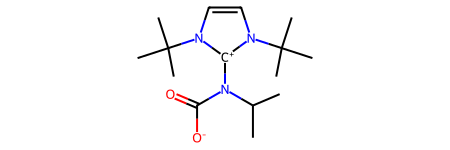

In [9]:
product_2 = Chem.MolFromSmiles('CC(C)N(C(=O)[O-])[c+]1n(C(C)(C)C)ccn1C(C)(C)C')
product_2

In [11]:
product_2 = Chem.AddHs(product_2)

rdDistGeom.EmbedMultipleConfs(product_2, 10, randomSeed=0xf00d) # generate 10 conformers
IPythonConsole.drawMol3D(product_2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
# Optomize conformers with MMFF94
# Loop through each conformer by its ID
for conf_id in range(product_2.GetNumConformers()):
    # Optimize each conformer by specifying the molecule and the conformer ID
    result = AllChem.MMFFOptimizeMolecule(product_2, confId=conf_id)
    print(f"Conformer {conf_id} optimization result: {result}")

Conformer 0 optimization result: 0
Conformer 1 optimization result: 0
Conformer 2 optimization result: 0
Conformer 3 optimization result: 0
Conformer 4 optimization result: 1
Conformer 5 optimization result: 0
Conformer 6 optimization result: 0
Conformer 7 optimization result: 0
Conformer 8 optimization result: 0
Conformer 9 optimization result: 0


In [13]:
# Export each conformer to an .xyz file
for conf_id in range(product_2.GetNumConformers()):
    filename = f'Product 2 Conformer {conf_id}.xyz'
    write_conformer_to_xyz(product_2, conf_id, filename)
    print(f'Product 2 Conformer {conf_id} saved as {filename}')

Product 2 Conformer 0 saved as Product 2 Conformer 0.xyz
Product 2 Conformer 1 saved as Product 2 Conformer 1.xyz
Product 2 Conformer 2 saved as Product 2 Conformer 2.xyz
Product 2 Conformer 3 saved as Product 2 Conformer 3.xyz
Product 2 Conformer 4 saved as Product 2 Conformer 4.xyz
Product 2 Conformer 5 saved as Product 2 Conformer 5.xyz
Product 2 Conformer 6 saved as Product 2 Conformer 6.xyz
Product 2 Conformer 7 saved as Product 2 Conformer 7.xyz
Product 2 Conformer 8 saved as Product 2 Conformer 8.xyz
Product 2 Conformer 9 saved as Product 2 Conformer 9.xyz
